In [1]:
import liionpack as lp
import pybamm

/home/ruihe_li/Env_liionpack/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-07 10:21:29,561	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
# Generate the netlist
netlist = lp.setup_circuit(Np=4, Ns=1, Rb=1e-3, Rc=1e-2)

In [3]:
# Define some additional variables to output
output_variables = [
    "X-averaged negative particle surface concentration [mol.m-3]",
    "X-averaged positive particle surface concentration [mol.m-3]",
]

# Cycling experiment, using PyBaMM
experiment = pybamm.Experiment(
    [
        "Charge at 5 A for 30 minutes",
        "Rest for 15 minutes",
        "Discharge at 5 A for 30 minutes",
        "Rest for 30 minutes",
    ],
    period="10 seconds",
)

In [4]:
# PyBaMM battery parameters
parameter_values = pybamm.ParameterValues("Chen2020")

In [5]:
# Solve the pack problem
output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    output_variables=output_variables,
    initial_soc=0.5,
)

Stepping simulation: 100%|██████████| 180/180 [00:02<00:00, 64.17it/s]


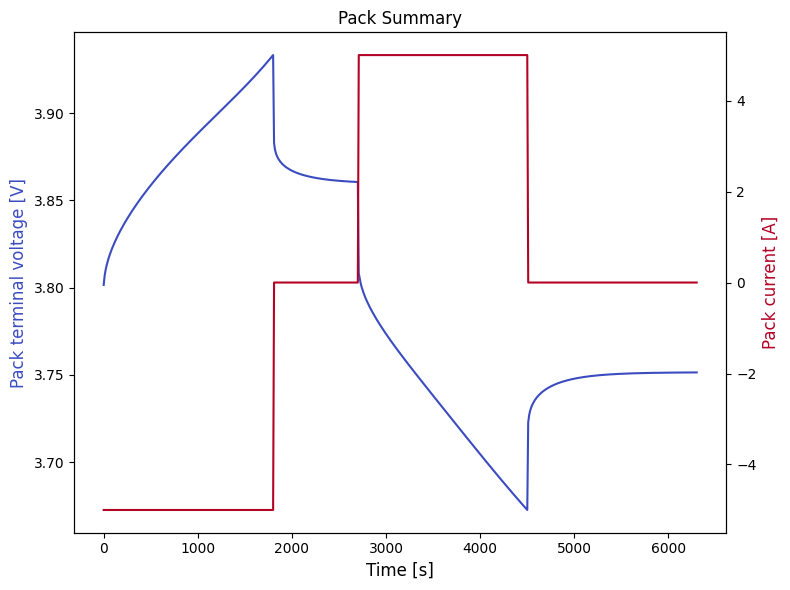

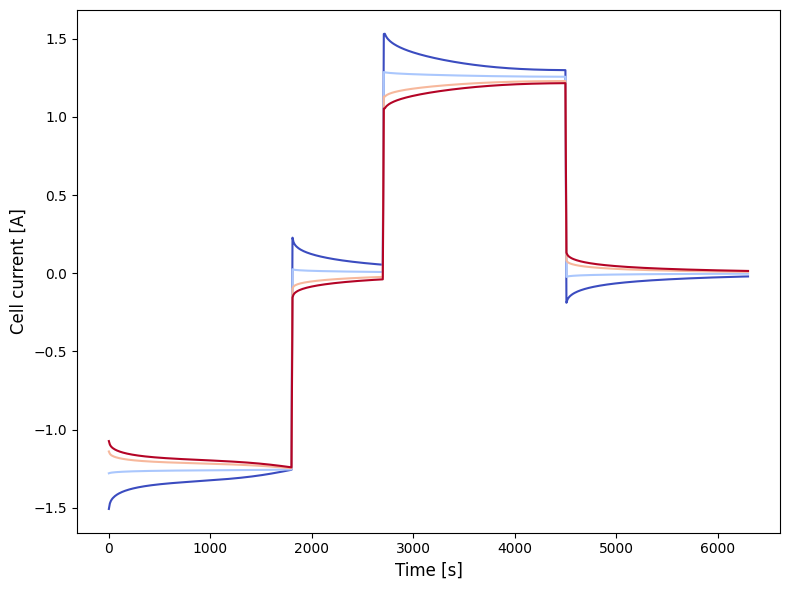

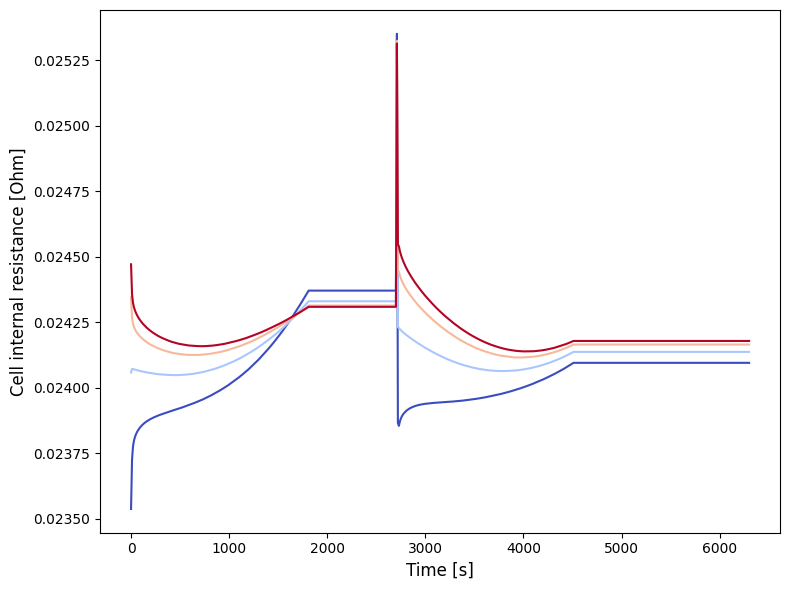

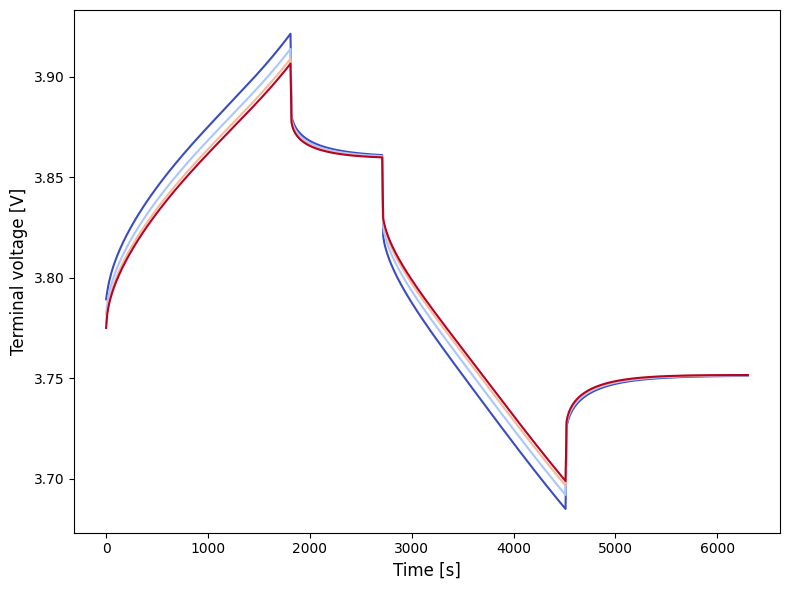

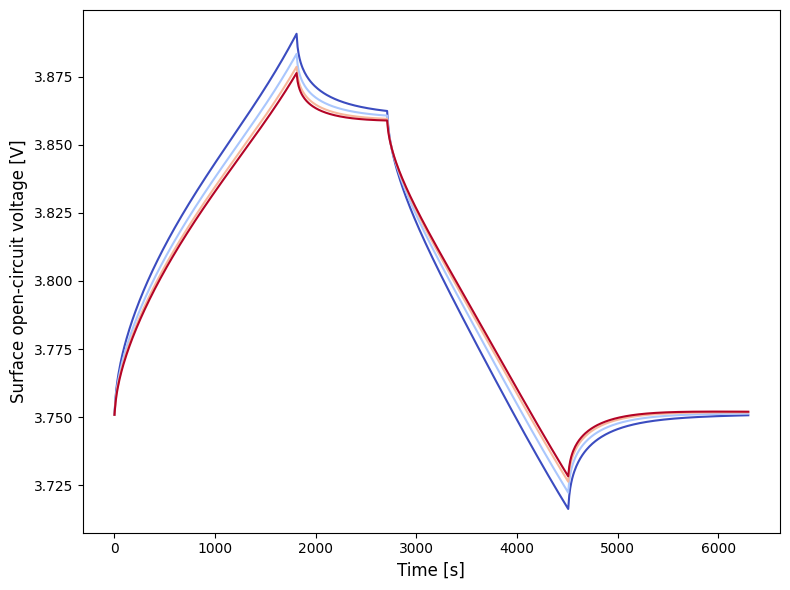

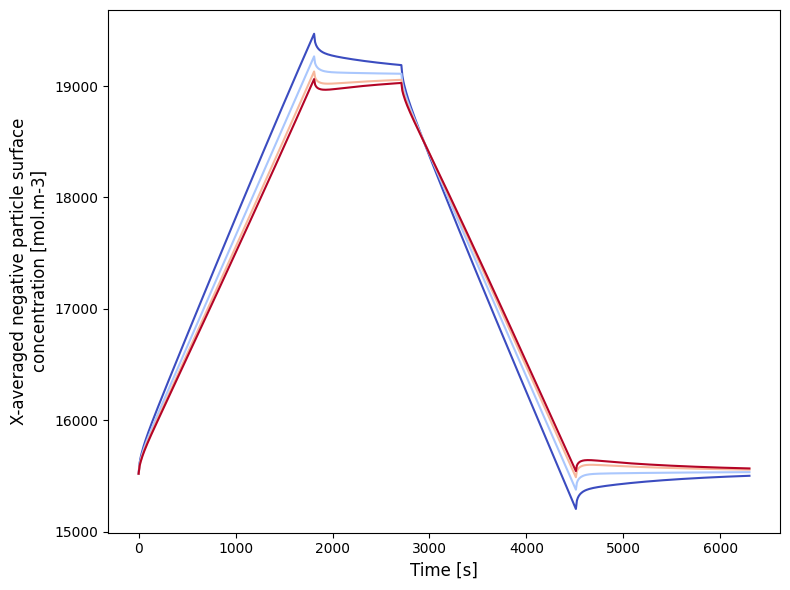

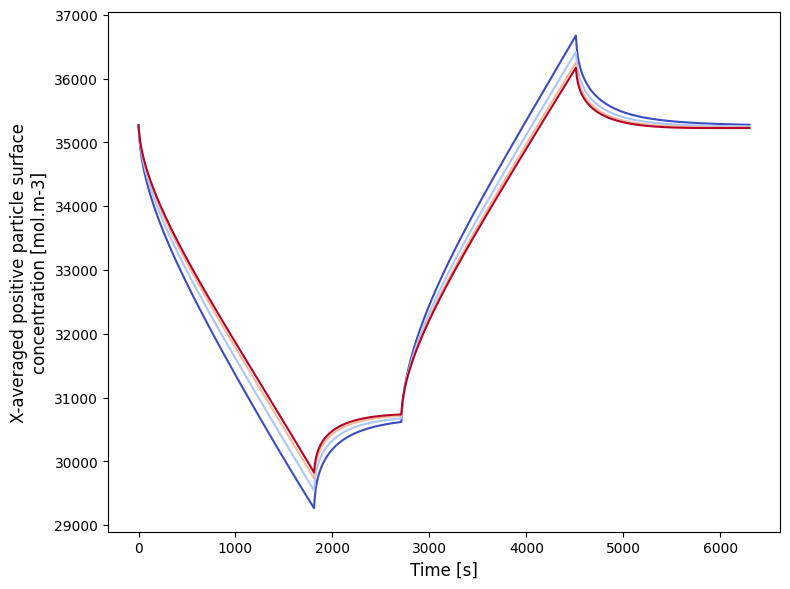

In [6]:
# Display the results
lp.plot_output(output, color="white")

In [7]:
# Draw the circuit at final state
lp.draw_circuit(netlist, cpt_size=1.0, node_spacing=2.2)

RuntimeError: pdflatex is not installed